### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

La lectura de datos y el cumplimiento de las especificaciones son procesos importantes para procesar y manipular datos de manera efectiva. Es necesario asegurarse de que los datos se leen correctamente y se cumplen las especificaciones requeridas, ya sea en términos de formato, estructura, contenido, calidad y otros aspectos relevantes.

In [3]:
amazon_prime = pd.read_parquet('../datasets/amazon_prime_titles.parquet')
disney_plus = pd.read_parquet('../datasets/disney_plus_titles.parquet')
hulu = pd.read_parquet('../datasets/hulu_titles.parquet')
netflix = pd.read_parquet('../datasets/netflix_titles.parquet')


rating_df = pd.read_parquet('../datasets/rating_total.parquet')

def generate_id(df, platform_name):
    """
    Genera un ID combinando la primera letra del nombre de la plataforma y el número de show_id
    
    Argumentos:
    df -- DataFrame de entrada
    platform_name -- str: nombre de la plataforma de streaming

    Devuelve:
    str -- ID generado
    """
    show_id = df["show_id"]
    return platform_name[0] + str(show_id)

def create_id_column(df, platform_name, generate_id_func):
    """
    Crea una columna 'movieId' en el DataFrame que contiene los IDs generados
    
    Argumentos:
    df -- DataFrame de entrada
    platform_name -- str: nombre de la plataforma de streaming
    generate_id_func -- función que genera el ID utilizando el DataFrame y el nombre de la plataforma
    
    Devuelve:
    df -- DataFrame con una columna 'movieId' que contiene los IDs generados
    """
    df["movieId"] = df.apply(generate_id_func, args=(platform_name,), axis=1)
    pop_id = df.pop('movieId')
    df.insert(0, "movieId", pop_id)
    df.drop(columns=["show_id"], inplace=True)


def cleaning_rows(df):
    """
    Limpia los valores de las celdas de un DataFrame eliminando los espacios en blanco y convirtiendo
    todos los caracteres a minúsculas.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame a limpiar.

    Returns:
    --------
    pandas.DataFrame
        DataFrame con los valores de las celdas limpios.
    """
    df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
    df = df.rename(columns={"rating": "classification"})
    return df


def fill_na(df):
    """
    Rellena valores NaN en la columna 'rating' con el valor 'G'

    Argumentos:
    df -- DataFrame de entrada

    Devuelve:
    df -- DataFrame con valores NaN en la columna 'rating' rellenados con 'G'
    """
    df["rating"].fillna(value="G", inplace=True)


def format_dates(df):
    """
    Formatea las fechas en el formato 'YYYY-MM-DD'

    Argumentos:
    df -- DataFrame de entrada

    Devuelve:
    df -- DataFrame con fechas formateadas en el formato 'YYYY-MM-DD'
    """
    df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
    df["date_added"] = pd.to_datetime(df["date_added"]).dt.strftime("%Y-%m-%d")
    return df


def duration_distrib(df):
    """
    Divide la columna 'duration' en dos columnas 'duration_int' y 'duration_type'

    Argumentos:
    df -- DataFrame de entrada

    Devuelve:
    df -- DataFrame con dos columnas adicionales 'duration_int' y 'duration_type'
    """


    df[["duration_int", "duration_type"]] = df["duration"].str.split(expand=True)
    df["duration_int"] = df["duration_int"].astype(float).astype("Int64")
    df.drop(columns="duration", inplace=True)
    return df


def main(df, platform_name):
    """
    Limpia y transforma un DataFrame dado utilizando las funciones cleaning_rows, create_id_column,
    fill_na, format_dates y duration_distrib.
    
    Argumentos:
    df -- DataFrame de entrada
    platform_name -- str: nombre de la plataforma de streaming
    
    Devuelve:
    DataFrame -- DataFrame con las transformaciones aplicadas.
    """
    
    
    create_id_column(df, platform_name, generate_id)
    fill_na(df)
    format_dates(df)
    duration_distrib(df)
    return cleaning_rows(df)


Aplicando las funciones de limpieza a todos los DataFrames

In [4]:
amazon_prime = main(amazon_prime, "amazon_prime")
disney_plus = main(disney_plus, "disney_plus")
hulu = main(hulu, "hulu")
netflix = main(netflix, "netflix")
rating_df = rating_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

C:\Users\mario\AppData\Local\Temp\ipykernel_8396\2437703307.py:85: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_added"] = pd.to_datetime(df["date_added"]).dt.strftime("%Y-%m-%d")
C:\Users\mario\AppData\Local\Temp\ipykernel_8396\2437703307.py:85: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_added"] = pd.to_datetime(df["date_added"]).dt.strftime("%Y-%m-%d")
C:\Users\mario\AppData\Local\Temp\ipykernel_8396\2437703307.py:85: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_added"] = pd.to_datetime(df["date_added"]).dt.strftime("%Y-%m-%d")
C:\Users\mari

Vamos a combinar la información de los DataFrames limpios con el DataFrame de Rating utilizando la columna "movieId" como clave común.

In [5]:

list_df = [amazon_prime, hulu, netflix, disney_plus]
list_df_merged = [pd.merge(df, rating_df, on='movieId', how='inner', sort=False) for df in list_df]
df_dict = dict(
    zip(['amazon_prime', 'hulu', 'netflix', 'disney_plus'], list_df_merged)
    )

"AutoViz" es útil para explorar rápidamente grandes conjuntos de datos. Dado que algunos DataFrames contienen más de 1 millón de registros, considero que AutoViz es la mejor opción.

In [7]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

### ANALISIS DE AMAZON PRIME

In [8]:
platform_data = df_dict['amazon_prime']

In [9]:
platform_data.shape

(4631850, 16)

Podemos ver la gran cantidad de registros disponibles en el dataframe de Amazon Prime, pero entremos mas en profundidad

In [10]:
AV.AutoViz(filename="", sep=',', depVar='target', dfte=platform_data, header=0, verbose=1, 
           lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=20)


    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
timestamp,9990,int64,0,0.000000,99.900000,0,
userId,8257,int64,0,0.000000,82.570000,0,
movieId,6170,object,0,0.000000,61.700000,1,combine rare categories
title,6164,object,0,0.000000,61.640000,1,combine rare categories
description,6037,object,0,0.000000,60.370000,1,combine rare categories
cast,5107,object,1276,12.760000,51.070000,1,"combine rare categories, fill missing, fix mixed data types"
director,3856,object,2211,22.110000,38.560000,1,"combine rare categories, fill missing, fix mixed data types"
listed_in,435,object,0,0.000000,4.350000,1,combine rare categories
duration_int,196,int64,0,0.000000,1.960000,0,
release_year,98,int64,0,0.000000,0.980000,0,


    16 Predictors classified...
        2 variables removed since they were ID or low-information variables
        List of variables removed: ['country', 'date_added']
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
Could not find given target var in data set. Please check input
Not able to read or load file. Please check your inputs and try again...


Podemos encontrar muchas particularidades en este DataFrame, vamos a enumerarlas:
1. La gran ausencia de datos en varias de las columnas, pero principalmente en las columnas de **date_added** y **country**  (Mas del 90% en ambas!!!)
2. Data mezclada en varias de las columnas.
3. La falta de datos en la columna **cast**, la cual esta directamente relacionada con uno de los endpoint desarrollados en la API.

Veamos la cantidad exacta

In [11]:
platform_data.isna().sum()

movieId                 0
type                    0
title                   0
director           997917
cast               591330
country           4309387
date_added        4557866
release_year            0
classification          0
listed_in               0
description             0
duration_int            0
duration_type           0
userId                  0
rating                  0
timestamp               0
dtype: int64

Podemos encontrar casi todos los registros no disponibles en las columnas de *country* y *data_added*.
Veamos en especifico estas columnas.

### PROBLEMA #01 : GRAN AUSENCIA DE DATOS

In [12]:
platform_data['country'].value_counts()

country
united states                            121125
india                                    110437
united kingdom                            13188
canada                                     7707
united kingdom, united states              5796
                                          ...  
united kingdom, canada, united states       454
france, china, belgium, monaco              454
germany, austria, united states             452
india, denmark                              445
france, belgium                             438
Name: count, Length: 86, dtype: int64

Vamos por partes:

1. Podemos ver cómo algunas celdas tienen más de un país registrado y divididos por comas. Esto genera problemas a la hora de hacer la solicitud a través de la API y problemas con el análisis de los datos.
2. Puede que existan algunas celdas con `whitespaces`
Estos son los puntos que deben ser mejorados en esta columna.

In [13]:
platform_data['date_added'].unique()

array(['march 30, 2021', 'april 1, 2021', 'april 4, 2021',
       'april 10, 2021', 'april 17, 2021', 'april 24, 2021',
       'may 2, 2021', 'june 3, 2021', None, 'april 13, 2021',
       'april 20, 2021', 'april 26, 2021', 'april 27, 2021',
       'april 30, 2021', 'may 1, 2021', 'may 9, 2021', 'may 11, 2021',
       'may 12, 2021', 'may 13, 2021', 'may 18, 2021', 'may 19, 2021',
       'may 22, 2021', 'may 24, 2021', 'may 29, 2021', 'june 4, 2021',
       'june 11, 2021', 'june 12, 2021', 'june 15, 2021', 'june 18, 2021',
       'june 20, 2021', 'june 21, 2021', 'june 22, 2021', 'june 23, 2021',
       'june 24, 2021', 'june 25, 2021', 'june 26, 2021', 'june 29, 2021',
       'july 1, 2021', 'july 3, 2021', 'july 8, 2021', 'july 12, 2021',
       'july 16, 2021', 'july 17, 2021', 'july 20, 2021', 'july 23, 2021',
       'july 24, 2021', 'july 26, 2021', 'july 27, 2021',
       'august 1, 2021', 'august 4, 2021', 'august 6, 2021',
       'august 14, 2021', 'august 15, 2021', 'august 

Podemos observar que todos los valores únicos en esta columna tienen una constante, solo son del año 2021. No existen registros de años anteriores en esta columna.

In [14]:
platform_data['release_year'].unique()

array([2014, 2018, 2017, 1989, 2016, 1994, 2020, 2019, 2008, 2001, 1941,
       1991, 2005, 2015, 2011, 2013, 1949, 2007, 2002, 1955, 1959, 1983,
       2009, 2012, 2010, 1986, 1988, 1920, 1936, 1992, 2021, 1993, 2006,
       1948, 1946, 1944, 1935, 1985, 1937, 1970, 1945, 1939, 1996, 1997,
       1974, 1938, 1978, 2004, 1943, 1975, 1960, 1934, 1940, 1961, 2003,
       2000, 1967, 1995, 1951, 1932, 1999, 1963, 1969, 1952, 1947, 1929,
       1990, 1925, 1968, 1987, 1942, 1979, 1980, 1981, 1976, 1966, 1973,
       1956, 1972, 1950, 1953, 1982, 1977, 1933, 1958, 1984, 1998, 1924,
       1922, 1926, 1954, 1930, 1971, 1965, 1931, 1923, 1962, 1964, 1957,
       1927], dtype=int64)

Encontramos una clara inconsistencia entre ambas columnas, las cuales deberian estar relacionadas.
Por la naturaleza del proyecto y la inconsistencia de la columna de **date_added**, es considerable directamente eliminarla.

### PROBLEMA #02 Y PROBLEMA #03: DATOS MEZCLADOS Y LA COLUMNA CAST

Miremos los tipos de datos de cada columna

In [15]:
platform_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4631850 entries, 0 to 4631849
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   movieId         object 
 1   type            object 
 2   title           object 
 3   director        object 
 4   cast            object 
 5   country         object 
 6   date_added      object 
 7   release_year    int64  
 8   classification  object 
 9   listed_in       object 
 10  description     object 
 11  duration_int    int64  
 12  duration_type   object 
 13  userId          int64  
 14  rating          float64
 15  timestamp       int64  
dtypes: float64(1), int64(4), object(11)
memory usage: 565.4+ MB


A excepcion de la columna de **date_added**; no parece haber una columna con un Dtype no acorde a la informacion que debe contener, pero segun la el diagrama disponible por AutoViz, los hay. Entremos en las columnas directamente relacionadas con los EndPoint.

En este caso seria unicamente la columna de **cast**

In [16]:
platform_data['cast'].value_counts()

cast
maggie binkley                                                                         26706
1                                                                                      16247
anne-marie newland                                                                     11533
cassandra peterson                                                                      9875
grace tamayo, erin webbs                                                                8205
                                                                                       ...  
lezley mcspadden, michael brown sr.                                                      412
rome brooks, matt bush                                                                   412
john payne, coleen gray, preston foster, neville brand, lee van cleef                    410
jesse metcalfe, brittany snow, ashanti, sophia bush, arielle kebbel, jenny mccarthy      410
mitzi gaynor, george hamilton, phil harris                       

Encontramos la inconsistencia de datos en la columna. Abria que hablar con el cliente para saber que hacer con ese dato faltante y si es posible reemplazarlo con la informacion correspondiente.

## NETFLIX

In [17]:
platform_data = df_dict['netflix']
platform_data.shape

(4224861, 16)

Encontamos un numero de registros similar al DataFrame de Amazon Prime.
Ahora entremos en profundidad

In [18]:
AV.AutoViz(filename="", sep=',', depVar='target', dfte=platform_data, header=0, verbose=1, 
           lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=20)

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
timestamp,9999,int64,0,0.000000,99.990000,0,
userId,8291,int64,0,0.000000,82.910000,0,
movieId,5945,object,0,0.000000,59.450000,1,combine rare categories
title,5943,object,0,0.000000,59.430000,1,combine rare categories
description,5929,object,0,0.000000,59.290000,1,combine rare categories
cast,5243,object,966,9.660000,52.430000,1,"combine rare categories, fill missing, fix mixed data types"
director,3284,object,3024,30.240000,32.840000,1,"combine rare categories, fill missing, fix mixed data types"
date_added,1505,object,14,0.140000,15.050000,1,"combine rare categories, fill missing, fix mixed data types"
country,557,object,970,9.700000,5.570000,1,"combine rare categories, fill missing, fix mixed data types"
listed_in,461,object,0,0.000000,4.610000,1,combine rare categories


    16 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
Could not find given target var in data set. Please check input
Not able to read or load file. Please check your inputs and try again...


1. Valores NaN en columna claves como **cast**, **country**, **duration_int** y **duration_type**
2. Tipos de datos mezclados en columnas claves como **duration_int**, **duration_type**, **cast**, **country**

Veamos el total de datos NaN

In [19]:
platform_data.isna().sum()

movieId                 0
type                    0
title                   0
director          1264989
cast               396075
country            398854
date_added           4734
release_year            0
classification          0
listed_in               0
description             0
duration_int         1396
duration_type        1396
userId                  0
rating                  0
timestamp               0
dtype: int64

### PROBLEMA #01 Y PROBLEMA #02: NaN VALUES Y DTYPES MEZCLADOS EN LA COLUMNA CAST

In [20]:
#platform_data[platform_data['cast'].apply(lambda x: len(set(x.split(','))))]


Este función de pandas nos entrega un error, pero el mensaje de error que devuelve nos ayuda a identificar el tipo de dato mezclado en la columna:

`AttributeError: 'NoneType' object has no attribute 'split'`

En el caso de los valores nulos en esta columna, se puede llegar a una solución relativamente fácil gracias a que no existen valores nulos en la columna de **title**, podemos encontrar el cast según el título.

Entremos ahora en la columna de **Country**

In [21]:
platform_data['country'].value_counts()

country
united states                            1352654
india                                     466550
united kingdom                            200754
japan                                     117364
south korea                                95274
                                          ...   
united kingdom, poland, united states        428
sweden, united kingdom, finland              425
united states, botswana                      423
spain, belgium, united states                421
spain, colombia                              416
Name: count, Length: 748, dtype: int64

Encontramos la misma situación que en la plataforma de Amazon Prime.

Vamos ahora con las columnas de **duration_int** y **durantion_type**

In [22]:
platform_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224861 entries, 0 to 4224860
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   movieId         object 
 1   type            object 
 2   title           object 
 3   director        object 
 4   cast            object 
 5   country         object 
 6   date_added      object 
 7   release_year    int64  
 8   classification  object 
 9   listed_in       object 
 10  description     object 
 11  duration_int    object 
 12  duration_type   object 
 13  userId          int64  
 14  rating          float64
 15  timestamp       int64  
dtypes: float64(1), int64(3), object(12)
memory usage: 515.7+ MB


Encontramos que la columna de **duration_int** es de tipo *object*; esto no es acorde a lo que debería mostrar; veamos sus valores.

In [23]:
platform_data['duration_int'].unique()

array([90, 2, 1, 91, 125, 9, 104, 127, 4, 67, 94, 5, 161, 61, 166, 147,
       103, 97, 106, 111, 3, 110, 105, 96, 124, 116, 98, 23, 115, 122, 99,
       88, 100, 6, 102, 93, 95, 85, 83, 113, 13, 182, 48, 145, 87, 92, 80,
       117, 128, 119, 143, 114, 118, 108, 63, 121, 142, 154, 120, 82, 109,
       101, 86, 229, 76, 89, 156, 112, 107, 129, 135, 136, 165, 150, 133,
       70, 84, 140, 78, 7, 64, 59, 139, 69, 148, 189, 141, 130, 138, 81,
       132, 10, 123, 65, 68, 66, 62, 74, 131, 39, 46, 38, 8, 17, 126, 155,
       159, 137, 12, 273, 36, 34, 77, 60, 49, 58, 72, 204, 212, 25, 73,
       29, 47, 32, 35, 71, 149, 33, 15, 54, 224, 162, 37, 75, 79, 55, 158,
       164, 173, 181, 185, 21, 24, 51, 151, 42, 22, 134, 177, 52, 14, 53,
       57, 28, 50, 26, 45, 171, 27, 44, 146, 20, 157, 203, 41, 30, 194,
       233, 237, 230, 195, 253, 152, 190, 160, 208, 180, 144, 174, 170,
       192, 209, 187, 172, 16, 186, 11, 193, 176, 56, 169, 40, 168, 312,
       153, 214, 31, 163, 19, <NA>, 179, 43

In [24]:
platform_data['duration_type'].unique()

array(['min', 'seasons', 'season', None], dtype=object)

Existen valores nulos dentro de la columna y tambien podemos encontrar algunos valores atipicos:

1. Es logico encontrar valores entre 1 y 12, ya muchas series populares pueden llegar a alcanzar ese numero de temporadas.
2. Encontramos valores curiosos como 16, 19, 22, 31, etc... Que causan curiosidad, debido a como podemos ver en los valores unicos de **duration_type**, son muy pocos minutos para ser una pelicula y valores muy altos para ser el numero de temporadas de una serie. 

Veamoslo mas en detalle el punto 2.

In [28]:
duration = platform_data[['title','duration_int', 'duration_type']].copy()
duration_masked = (duration['duration_int'] >= 12) & (duration['duration_int'] <= 60)
duration[duration_masked].shape[0]

233793

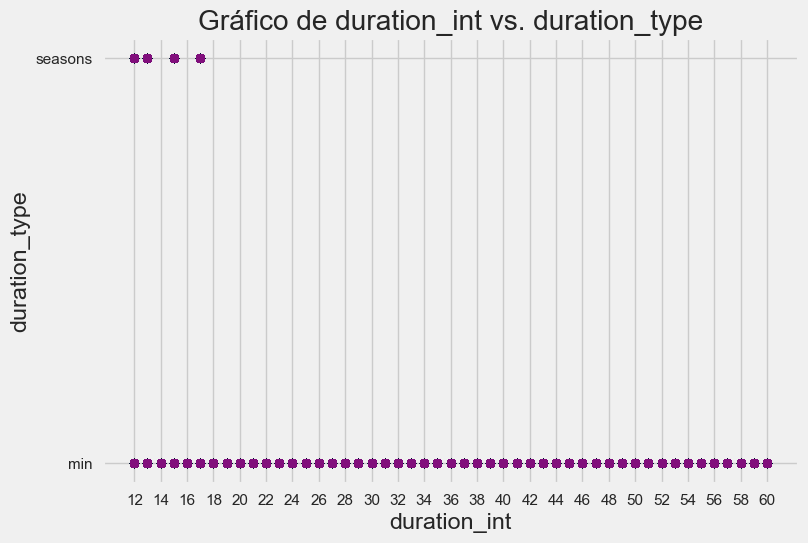

In [33]:
# Graficamos solo los valores de la columna1 que cumplen la condición
plt.scatter(duration['duration_int'][duration_masked], duration['duration_type'][duration_masked])

plt.xticks(np.arange(12, 62, 2))

# Agregamos etiquetas a los ejes x e y y un título al gráfico
plt.xlabel('duration_int')
plt.ylabel('duration_type')
plt.title('Gráfico de duration_int vs. duration_type')

plt.show()

- Segun esta grafica podemos encontrar contenido en minutos incluso menores a 1 hora, casi descartando de esta manera que sean peliculas.
- Podemos ver que hay registros que llegan a las 17 temporadas.
Veamos en especifico esto

In [34]:
duration.query("duration_int >= 12 & duration_type == 'seasons'").value_counts()

title                   duration_int  duration_type
criminal minds          12            seasons          521
heartland               13            seasons          509
trailer park boys       12            seasons          493
ncis                    15            seasons          492
comedians of the world  13            seasons          491
supernatural            15            seasons          460
grey's anatomy          17            seasons          444
red vs. blue            13            seasons          438
Name: count, dtype: int64

Gracias a esto podemos ver que estos valores de *seasons* tan largos son en realidad outliers debidos a series con muchas temporadas. **(17 temporadas??!!)**

In [35]:
duration.query("duration_int <= 60 & duration_type == 'min'").value_counts()

title                                              duration_int  duration_type
leapfrog: sing-along, read-along                   32            min              558
the first temptation of christ                     46            min              544
thunderbolt                                        42            min              536
meet the trumps: from immigrant to president       48            min              536
felipe esparza: they're not going to laugh at you  58            min              536
                                                                                 ... 
nova: extreme animal weapons                       53            min              429
nova: prediction by the numbers                    53            min              426
fadily camara : la plus drôle de tes copines       54            min              419
el especial de alex fernández, el especial         52            min              408
rob schneider: asian momma, mexican kids           44        

Tomando como ejemplo el título de *"Felipe Esparza: They're Not Going to Laugh at You"*, pudimos identificarlo como un stand-up de comedia, lo cual es lógico que aparezca y nos da pie a concluir que estos outliers puedan ser en realidad documentales o contenido especial de un solo registro.





In [36]:
duration.query("duration_int <= 20 & duration_type == 'min'").value_counts()

title                                                                         duration_int  duration_type
the road to el camino: behind the scenes of el camino: a breaking bad movie   14            min              522
calico critters: everyone's big dream flying in the sky                       11            min              510
the battle of midway                                                          18            min              506
little miss sumo                                                              20            min              501
if anything happens i love you                                                13            min              497
one like it                                                                   15            min              490
american factory: a conversation with the obamas                              10            min              488
besieged bread                                                                12            min        

Tomando como ejemplo el título de *Silent*, podemos identificarlo como un cortometraje animado, lo que lleva a la conclusión de que estos registros con tiempos de duración tan pequeños pueden ser en realidad outliers y no errores como aparentaban al principio.

In [37]:
platform_data[['duration_int', 'duration_type']].isna().sum()

duration_int     1396
duration_type    1396
dtype: int64

Hay varios datos perdidos en esta columna y esta particularidad de que el número de datos perdidos en ambos es exactamente el mismo, hizo pensar que puede haber algo fuera de lo común con las demás columnas. Efectivamente, se encontró una particularidad en la columna de **classification**

In [38]:
platform_data['classification'].unique()

array(['pg-13', 'tv-ma', 'pg', 'tv-14', 'tv-pg', 'tv-y', 'tv-y7', 'r',
       'tv-g', 'g', 'nc-17', '74 min', '84 min', '66 min', 'nr',
       'tv-y7-fv', 'ur'], dtype=object)

Para llenar los datos faltantes en estas registros de **duration_int** y **duration_type** es necesario extraer la data faltante de esta columna.

### DISNEY+

In [39]:
platform_data = df_dict['disney_plus']
platform_data.shape

(694790, 16)

In [40]:
AV.AutoViz(filename="", sep=',', depVar='target', dfte=platform_data, header=0, verbose=1, 
           lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=20)

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
timestamp,9996,int64,0,0.000000,99.960000,0,
userId,8313,int64,0,0.000000,83.130000,0,
movieId,1447,object,0,0.000000,14.470000,1,combine rare categories
title,1447,object,0,0.000000,14.470000,1,combine rare categories
description,1445,object,0,0.000000,14.450000,1,combine rare categories
cast,1190,object,1297,12.970000,11.900000,1,"combine rare categories, fill missing, fix mixed data types"
director,607,object,3288,32.880000,6.070000,1,"combine rare categories, fill missing, fix mixed data types"
listed_in,329,object,0,0.000000,3.290000,1,combine rare categories
date_added,167,object,14,0.140000,1.670000,2,"combine rare categories, fill missing, fix mixed data types"
duration_int,146,int64,0,0.000000,1.460000,0,


    16 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
Could not find given target var in data set. Please check input
Not able to read or load file. Please check your inputs and try again...


Aplicaremos los mismos criterios de análisis que en los DataSets anteriores, con un enfoque en las columnas que están directamente relacionadas con los puntos finales de la API:

1. Tipos de datos mezclados en columnas importantes como el **cast** y **country**.
2. Datos faltantes en estas mismas columnas.

In [41]:
platform_data.isna().sum()

movieId                0
type                   0
title                  0
director          226798
cast               90666
country           105004
date_added          1524
release_year           0
classification         0
listed_in              0
description            0
duration_int           0
duration_type          0
userId                 0
rating                 0
timestamp              0
dtype: int64

#### PROBLEMA #01 Y 02: DATOS FALTANTES Y TIPO DE DATOS MEZCLADOS

In [42]:
key_data = platform_data[['cast', 'country', 'release_year']].copy()

Veamos primero los datos mezclados

In [46]:
for i, value in enumerate(key_data['cast'].unique()):
    print(i, value)
    if i == 19:
        break

0 chris diamantopoulos, tony anselmo, tress macneille, bill farmer, russi taylor, corey burton
1 jim varney, noelle parker, douglas seale
2 raymond albert romano, john leguizamo, denis leary, queen latifah
3 darren criss, adam lambert, derek hough, alexander jean, fall out boy, jimmie allen
4 john lennon, paul mccartney, george harrison, ringo starr
5 jacques yves cousteau, vincent cassel
6 jeremy renner, hailee steinfeld, vera farmiga, fra fee, tony dalton, zahn mcclarnon
7 gary muehlberger, mary miller, curly leach, sam carlson, stuart andrews, david squibb
8 dr. ray ball, dr. lauren smith, chris massaro, tiffany burns, mike burns, melinda mendolusky
9 steve whitmire, dave goelz, bill barretta, eric jacobson
10 don hahn, kathryn beaumont, pete docter, kevin feige, mark hamill, bob iger
11 None
12 stacy keach, john lasseter, brad bird, john musker, ron clements, frank thomas
13 dr. michelle oakley, zachary fine
14 michael b. jordan
15 jack dylan grazer, marco barricelli
16 mia jenness

De esta forma podemos identificar en el indice 11 un valor None, el cual puede ser la razón de los valores faltantes.

In [47]:
key_data['country'].unique()

array([None, 'united states', 'united states, canada',
       'united states, australia', 'canada',
       'united states, united kingdom', 'united states, south korea',
       'ireland, united states, canada, united kingdom, denmark, spain, poland, hungary',
       'france, united kingdom', 'united kingdom, australia',
       'ireland, united states', 'canada, united states, france',
       'france, south korea, japan, united states', 'france',
       'united states, united kingdom, hungary', 'united states, germany',
       'united states, united kingdom, australia', 'united states, india',
       'united states, canada, united kingdom, singapore, australia, thailand',
       'canada, united states',
       'south korea, united states, china, japan',
       'australia, united kingdom', 'united kingdom',
       'united states, united kingdom, south korea',
       'united states, united kingdom, canada',
       'united states, germany, united kingdom',
       'united states, canada, ir

Podemos encontrar el mismo error que en los DataSets anteriores.

### HULU

In [48]:
platform_data = df_dict['hulu']

platform_data.shape

(1472788, 16)

In [49]:
AV.AutoViz(filename="", sep=',', depVar='target', dfte=platform_data, header=0, verbose=1, 
           lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=20)

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
timestamp,9995,int64,0,0.000000,99.950000,0,
userId,8193,int64,0,0.000000,81.930000,0,
movieId,2949,object,0,0.000000,29.490000,1,combine rare categories
title,2947,object,0,0.000000,29.470000,1,combine rare categories
description,2935,object,11,0.110000,29.350000,1,"combine rare categories, fill missing, fix mixed data types"
date_added,1093,object,82,0.820000,10.930000,1,"combine rare categories, fill missing, fix mixed data types"
listed_in,435,object,0,0.000000,4.350000,1,combine rare categories
country,147,object,4605,46.050000,1.470000,1,"combine rare categories, fill missing, fix mixed data types"
duration_int,125,object,1547,15.470000,1.250000,1,"combine rare categories, fill missing, fix mixed data types"
classification,85,object,0,0.000000,0.850000,1,combine rare categories


    16 Predictors classified...
        2 variables removed since they were ID or low-information variables
        List of variables removed: ['director', 'cast']
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
Could not find given target var in data set. Please check input
Not able to read or load file. Please check your inputs and try again...


Vamos por partes:
- La columna **cast** esta parcialmente vacia **TERRIBLE**
- 46% de los datos no disponibles en en la columna de **country**
- Datos mezclados en columnas directamente relacionados con los endpoints de la API

In [50]:
platform_data.isna().sum()

movieId                 0
type                    0
title                   0
director          1471380
cast              1472788
country            696835
date_added          13422
release_year            0
classification          0
listed_in               0
description          1815
duration_int       229721
duration_type      229721
userId                  0
rating                  0
timestamp               0
dtype: int64

El total de registros es de 1472788 y hay un total de 1472788 registros faltantes en la columna de **cast** 😰😰😰



Dejemosla de lado de momento

In [51]:
platform_data['duration_int'].unique()

array([<NA>, 94, 108, 97, 104, 1, 88, 3, 113, 6, 87, 7, 2, 4, 84, 95, 15,
       101, 93, 105, 12, 8, 99, 112, 124, 23, 145, 125, 157, 41, 89, 5,
       80, 90, 116, 102, 100, 110, 114, 115, 130, 133, 91, 121, 96, 107,
       103, 109, 98, 119, 106, 111, 118, 117, 136, 181, 182, 128, 138,
       126, 72, 16, 20, 9, 86, 75, 144, 26, 76, 129, 83, 92, 127, 139, 79,
       192, 131, 123, 122, 82, 10, 81, 134, 135, 170, 162, 40, 13, 45,
       152, 85, 14, 146, 11, 161, 29, 143, 142, 63, 42, 17, 120, 77, 65,
       70, 19, 30, 22, 149, 52, 60, 153, 151, 46, 37, 132, 67, 44, 51, 58,
       71, 74, 78, 25, 57, 34, 54, 56], dtype=object)

In [52]:
platform_data['duration_type'].unique()

array([None, 'min', 'season', 'seasons'], dtype=object)

Encontramos valores nulos en ambas columnas y viendo un caso similar al DataSet anterior, se reviso en la columna de **classification**

In [53]:
platform_data['classification'].unique()

array(['tv-ma', 'g', 'pg-13', 'r', 'tv-14', 'pg', 'tv-pg', 'not rated',
       'tv-g', '2 seasons', 'tv-y', '93 min', '4 seasons', 'tv-y7',
       '136 min', '91 min', '85 min', '98 min', '89 min', '94 min',
       '86 min', '3 seasons', '121 min', '88 min', '101 min', '1 season',
       '83 min', '100 min', '95 min', '92 min', '96 min', '109 min',
       '99 min', '75 min', '87 min', '67 min', '104 min', '107 min',
       '84 min', '103 min', '105 min', '119 min', '114 min', '82 min',
       '90 min', '130 min', '110 min', '80 min', '6 seasons', '97 min',
       '111 min', '81 min', '49 min', '45 min', '41 min', '73 min',
       '40 min', '36 min', '39 min', '34 min', '47 min', '65 min',
       '37 min', '78 min', '102 min', '129 min', '115 min', '112 min',
       'nr', '61 min', '106 min', '76 min', '77 min', '79 min', '157 min',
       '28 min', '64 min', '7 min', '5 min', '6 min', '127 min',
       '142 min', '108 min', '57 min', '118 min', '116 min', '12 seasons',
       '71 min']

Hay que hacer el mismo proceso de reacomodación de datos que se debe utilizar en datasets anteriores

In [54]:
platform_data['country'].value_counts()

country
united states                                     440510
japan                                             128979
united kingdom                                     54013
canada                                             16261
united kingdom, united states                      12368
                                                   ...  
united states, united kingdom, germany, canada       437
ireland, united kingdom, germany, sweden             435
united states, germany, bulgaria, china              430
australia, united kingdom                            428
united states, ireland                               427
Name: count, Length: 150, dtype: int64

Encontramos el mismo error que en los demás datasets

In [66]:
platform_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472788 entries, 0 to 1472787
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   movieId         1472788 non-null  object 
 1   type            1472788 non-null  object 
 2   title           1472788 non-null  object 
 3   director        1408 non-null     object 
 4   cast            0 non-null        float64
 5   country         775953 non-null   object 
 6   date_added      1459366 non-null  object 
 7   release_year    1472788 non-null  int64  
 8   classification  1472788 non-null  object 
 9   listed_in       1472788 non-null  object 
 10  description     1470973 non-null  object 
 11  duration_int    1243067 non-null  object 
 12  duration_type   1243067 non-null  object 
 13  userId          1472788 non-null  int64  
 14  rating          1472788 non-null  float64
 15  timestamp       1472788 non-null  int64  
dtypes: float64(2), int64(3), object(11)


In [72]:
platform_data['date_added'].value_counts()
platform_data['date_added'].unique()

array(['october 24, 2021', 'october 23, 2021', 'october 22, 2021', ...,
       'june 1, 2008', 'july 14, 2006', None], dtype=object)

In [55]:
platform_data['type'].unique()

array(['movie', 'tv show'], dtype=object)

In [65]:
print(platform_data['director'].unique())
print()
print('Cantidad de registros unicos en la columna director:',len(platform_data['director'].unique()))

[None
 'director jennifer kent ("the babadook") tells the sweeping tale of a young woman\'s quest for revenge set in 1825 against the perilous and unforgiving terrain of tasmania.'
 'director gigi saul guerrero talks through culture shock’s themes – immigration, filmmaking, and latinidad – in this one-on-one chat.'
 'director alex winter goes inside the biggest global corruption scandal in history that was uncovered by hundreds of journalists, working in secret and at enormous risk.']

Cantidad de registros unicos en la columna director: 4


Encontramos 4 tipos de valores diferentes en la columna de director, los cuales nombran a directores, pero incluyendo polémicas a las que están ligados. (?)

Retomando la búsqueda de los actores, no se pudo identificar si esta información estaba mal digitada en otra columna o en otra registro. Esto permite concluir que es información sensible perdida. **HABLAR CON EL CLIENTE**.

### CONCLUSIONES

El análisis exploratorio de los datos es un proceso muy importante para la identificación y facilitación del proceso ETL sobre las bases de datos que llegan al científico de datos. Gracias a esto, pudimos identificar los diferentes errores que existen en los datasets, además de permitirnos solucionar algunas dudas sobre qué hacer con los valores faltantes (dilema de cada proyecto), si debo rellenarlos con otra información o directamente eliminar los registros.

Este proceso también nos permitió identificar errores groseros como el caso de la columna de "cast" en la plataforma de **HULU** y la detección de outliers como la diferencia de duración de los diferentes contenidos de las plataformas.

En conclusión, gracias al EDA podemos reducir dolores de cabeza inmensos que pueden retrasar el objetivo del trabajo.